Perform the following operations using Python by creating student
performance dataset.
1. Display Missing Values
2. Replace missing values using any 2 suitable
3. Identify outliers using boxplot and scatterplot
4. Handle outlier using any technique
5. Perform any 2 data normalization technique

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Create a sample student performance dataset
data = {
    'Student_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Helen', 'Ivy', 'Jack'],
    'Math_Score': [85, 90, 88, np.nan, 92, 78, 85, 95, 200, 87],
    'Science_Score': [78, 85, 80, 504, np.nan, 88, 90, 82, 85, 79],
    'English_Score': [92, 88, np.nan, 85, 90, 84, 87, 95, 309, 91]
}

student_df = pd.DataFrame(data)

In [8]:
# Display missing values
missing_values = student_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Student_ID       0
Name             0
Math_Score       1
Science_Score    1
English_Score    1
dtype: int64


In [9]:
# Replace missing values using mean and median
student_df['Math_Score'].fillna(student_df['Math_Score'].mean(), inplace=True)
student_df['Science_Score'].fillna(student_df['Science_Score'].median(), inplace=True)
student_df['English_Score'].fillna(student_df['English_Score'].mean(), inplace=True)

In [10]:
# Display the modified DataFrame after replacing missing values
print("\nModified DataFrame after replacing missing values:\n", student_df)


Modified DataFrame after replacing missing values:
    Student_ID     Name  Math_Score  Science_Score  English_Score
0           1    Alice   85.000000           78.0           92.0
1           2      Bob   90.000000           85.0           88.0
2           3  Charlie   88.000000           80.0           89.0
3           4    David   86.666667           94.0           85.0
4           5     Emma   92.000000           85.0           90.0
5           6    Frank   78.000000           88.0           84.0
6           7    Grace   85.000000           90.0           87.0
7           8    Helen   95.000000           82.0           95.0
8           9      Ivy   80.000000           85.0           89.0
9          10     Jack   87.000000           79.0           91.0


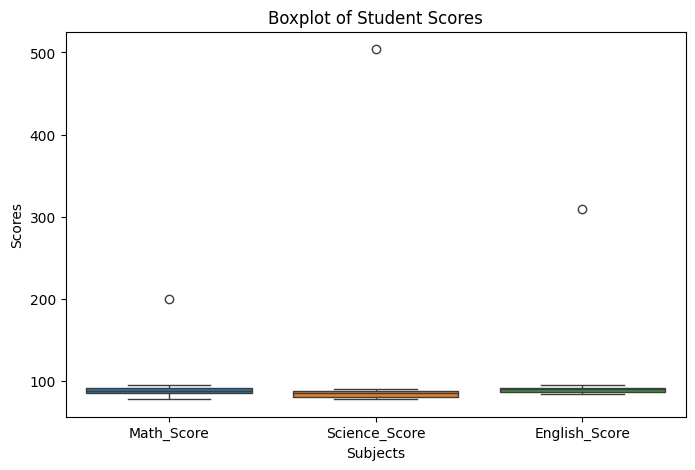

In [35]:
# Identify outliers using boxplot and scatterplot
# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=student_df[['Math_Score', 'Science_Score', 'English_Score']])
plt.title("Boxplot of Student Scores")
plt.xlabel("Subjects")
plt.ylabel("Scores")
plt.show()

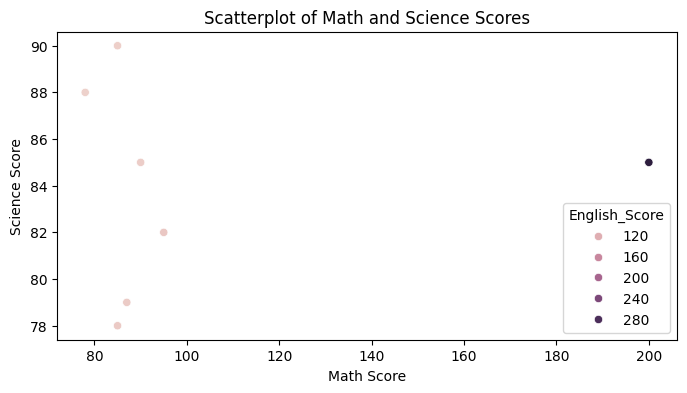

In [37]:
# Scatterplot
plt.figure(figsize=(8, 4))
sns.scatterplot(data=student_df, x='Math_Score', y='Science_Score', hue='English_Score')
plt.title("Scatterplot of Math and Science Scores")
plt.xlabel("Math Score")
plt.ylabel("Science Score")
plt.show()

In [38]:
# Handle outliers using winsorization technique
from scipy.stats.mstats import winsorize

In [39]:
# Winsorize outliers in Math_Score
student_df['Math_Score_winsorized'] = winsorize(student_df['Math_Score'], limits=[0.05, 0.05])

# Winsorize outliers in Science_Score
student_df['Science_Score_winsorized'] = winsorize(student_df['Science_Score'], limits=[0.05, 0.05])

# Winsorize outliers in English_Score
student_df['English_Score_winsorized'] = winsorize(student_df['English_Score'], limits=[0.05, 0.05])

In [40]:
# Display the modified DataFrame after winsorization
print("\nModified DataFrame after winsorization:\n", student_df[['Math_Score_winsorized', 'Science_Score_winsorized', 'English_Score_winsorized']])


Modified DataFrame after winsorization:
    Math_Score_winsorized  Science_Score_winsorized  English_Score_winsorized
0                   85.0                      78.0                      92.0
1                   90.0                      85.0                      88.0
2                   88.0                      80.0                       NaN
3                    NaN                     504.0                      85.0
4                   92.0                       NaN                      90.0
5                   78.0                      88.0                      84.0
6                   85.0                      90.0                      87.0
7                   95.0                      82.0                      95.0
8                  200.0                      85.0                     309.0
9                   87.0                      79.0                      91.0


In [48]:
# Trim the extreme values (e.g., 1% from both ends)
trimmed_df = student_df.copy()
for col in student_df.columns[2:]:  # Exclude 'Student_ID' and 'Name' columns
    lower_limit = student_df[col].quantile(0.01)
    upper_limit = student_df[col].quantile(0.99)
    trimmed_df[col] = student_df[col].clip(lower=lower_limit, upper=upper_limit)

print("Original Student Dataset:")
print(student_df)

print("\nTrimmed Student Dataset:")
print(trimmed_df)

Original Student Dataset:
   Student_ID     Name  Math_Score  Science_Score  English_Score  \
0           1    Alice        85.0           78.0           92.0   
1           2      Bob        90.0           85.0           88.0   
2           3  Charlie        88.0           80.0            NaN   
3           4    David         NaN          504.0           85.0   
4           5     Emma        92.0            NaN           90.0   
5           6    Frank        78.0           88.0           84.0   
6           7    Grace        85.0           90.0           87.0   
7           8    Helen        95.0           82.0           95.0   
8           9      Ivy       200.0           85.0          309.0   
9          10     Jack        87.0           79.0           91.0   

   Math_Score_winsorized  Science_Score_winsorized  English_Score_winsorized  \
0                   85.0                      78.0                      92.0   
1                   90.0                      85.0               

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [49]:
# Impute missing values with the mean
imputed_df = student_df.copy()
for col in student_df.columns[2:]:
    imputed_df[col] = student_df[col].fillna(student_df[col].mean())

print("\nImputed Student Dataset:")
print(imputed_df)


Imputed Student Dataset:
   Student_ID     Name  Math_Score  Science_Score  English_Score  \
0           1    Alice        85.0      78.000000      92.000000   
1           2      Bob        90.0      85.000000      88.000000   
2           3  Charlie        88.0      80.000000     113.444444   
3           4    David       100.0     504.000000      85.000000   
4           5     Emma        92.0     130.111111      90.000000   
5           6    Frank        78.0      88.000000      84.000000   
6           7    Grace        85.0      90.000000      87.000000   
7           8    Helen        95.0      82.000000      95.000000   
8           9      Ivy       200.0      85.000000     309.000000   
9          10     Jack        87.0      79.000000      91.000000   

   Math_Score_winsorized  Science_Score_winsorized  English_Score_winsorized  \
0                   85.0                 78.000000                 92.000000   
1                   90.0                 85.000000               

In [42]:
# Perform data normalization techniques (e.g., Min-Max Scaling and Standardization)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [47]:
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
student_df[['Math_Score_normalized', 'Science_Score_normalized', 'English_Score_normalized']] = min_max_scaler.fit_transform(student_df[['Math_Score', 'Science_Score', 'English_Score']])

student_df[['Math_Score_normalized', 'Science_Score_normalized', 'English_Score_normalized']]

,Math_Score_normalized,Science_Score_normalized,English_Score_normalized
0,0.057377,0.000000,0.035556
1,0.098361,0.016432,0.017778
2,0.081967,0.004695,NaN
3,NaN,1.000000,0.004444
4,0.114754,NaN,0.026667
5,0.000000,0.023474,0.000000
6,0.057377,0.028169,0.013333
7,0.139344,0.009390,0.048889
8,1.000000,0.016432,1.000000
9,0.073770,0.002347,0.031111


In [44]:
# Standardization
standard_scaler = StandardScaler()
student_df[['Math_Score_standardized', 'Science_Score_standardized', 'English_Score_standardized']] = standard_scaler.fit_transform(student_df[['Math_Score', 'Science_Score', 'English_Score']])


In [45]:
# Display the modified DataFrame after normalization
print("\nModified DataFrame after normalization:\n", student_df[['Math_Score_normalized', 'Science_Score_normalized', 'English_Score_normalized', 'Math_Score_standardized', 'Science_Score_standardized', 'English_Score_standardized']])


Modified DataFrame after normalization:
    Math_Score_normalized  Science_Score_normalized  English_Score_normalized  \
0               0.057377                  0.000000                  0.035556   
1               0.098361                  0.016432                  0.017778   
2               0.081967                  0.004695                       NaN   
3                    NaN                  1.000000                  0.004444   
4               0.114754                       NaN                  0.026667   
5               0.000000                  0.023474                  0.000000   
6               0.057377                  0.028169                  0.013333   
7               0.139344                  0.009390                  0.048889   
8               1.000000                  0.016432                  1.000000   
9               0.073770                  0.002347                  0.031111   

   Math_Score_standardized  Science_Score_standardized  \
0                -0